In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from mlxtend.preprocessing import minmax_scaling
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from math import sqrt
import statsmodels.formula.api as smf
from sklearn.preprocessing import  PolynomialFeatures
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from numba import jit
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("ks-projects-201801.csv", encoding='ISO-8859-1')
data = data.iloc[0:1000,:]
type(data)

pandas.core.frame.DataFrame

In [3]:
original_data = np.random.exponential(size = 1000)

In [4]:
scaled_data = minmax_scaling(original_data, columns = [0])

In [5]:
# fig, ax = plt.subplots(1,2)
# sns.distplot(original_data, ax=ax[0])
# ax[0].set_title('Original data')
# sns.distplot(scaled_data, ax=ax[1])
# ax[1].set_title("Scaled data")

In [6]:
# normalized_data = stats.boxcox(original_data)

# # plot both together to compare
# fig, ax=plt.subplots(1,2)
# sns.distplot(original_data, ax=ax[0])
# ax[0].set_title("Original Data")
# sns.distplot(normalized_data[0], ax=ax[1])
# ax[1].set_title("Normalized data")

In [7]:
#data.head()

In [8]:
data.drop("name", inplace=True, axis=1)
data.drop("category", inplace=True, axis=1)

data.drop("usd_pledged_real", inplace=True, axis=1)
data.drop("usd_goal_real", inplace=True, axis=1)

In [9]:
frame = data['launched'].str.split('-', 1, expand=True)
frame1 = data['deadline'].str.split('-', 1, expand=True)
data['launched'] = frame[0]
data['deadline'] = frame1[0]

In [10]:
data['deadline'] = pd.to_numeric(data['deadline'])
data['launched'] = pd.to_numeric(data['launched'])
data['duration'] = data['deadline'] - data['launched']
data = data.fillna(method='ffill')
data.nunique()
type(data)
data.head()
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [11]:

# # from sklearn.preprocessing import OneHotEncoder
# # l = OneHotEncoder()
# # l.fit(data['main_category'].reshape(-1,1))
# # data['main_category'] = l.transform(data['main_category'])

# # l = LabelEncoder()
# # l.fit(data['currency'])
# # data['currency'] = l.transform(data['currency'])

# # l = LabelEncoder()
# # l.fit(data['deadline'])
# # data['deadline'] = l.transform(data['deadline'])

# # datal = LabelEncoder()
# # l.fit(data['launched'])
# # data['launched'] = l.transform(data['launched'])

l = LabelEncoder()
l.fit(data['state'])
data['state'] = l.transform(data['state'])


# # l = LabelEncoder()
# # l.fit(data['country'])
# # data['country'] = l.transform(data['country'])
# data.head()
# print(type(data))

In [12]:
print(type(data))
Y = data['state'].values
print(type(data))
data.drop('ID', inplace=True, axis=1)
data.drop('state', inplace=True, axis=1)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [13]:
one_hot = pd.get_dummies(data['main_category'])
data.drop("main_category",inplace = True, axis = 1)
data = data.join(one_hot)

one_hot = pd.get_dummies(data['currency'])
data.drop("currency",inplace = True, axis = 1)
data = data.join(one_hot)

one_hot = pd.get_dummies(data['duration'])
data.drop("duration",inplace = True, axis = 1)
data = data.join(one_hot)

one_hot = pd.get_dummies(data['launched'])
data.drop("launched",inplace = True, axis = 1)
data = data.join(one_hot)

# one_hot = pd.get_dummies(data['state'])
# data.drop("state",inplace = True, axis = 1)
# data = data.join(one_hot)

one_hot = pd.get_dummies(data['country'])
data.drop("country", inplace = True, axis = 1)
data = data.join(one_hot)

In [14]:
sc_X = MinMaxScaler(feature_range=(-1,1), copy=False)
sc_y = MinMaxScaler(feature_range=(-1,1), copy=False)
data = sc_X.fit_transform(data)
print((Y.shape))
Y = sc_y.fit_transform(Y.reshape(1000,1))
print((Y.shape))
X_train, X_test, y_train, y_test = train_test_split(data, Y, test_size=0.1, random_state=42)


(1000,)
(1000, 1)


E:\Applications\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
E:\Applications\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [15]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
variance = metrics.explained_variance_score(y_test, reg.predict(X_test))

rms = sqrt(metrics.mean_squared_error(y_test, reg.predict(X_test)))

In [17]:
print(rms)
print(variance)

10386040382.56548
-5.21441096093199e+20


In [18]:
print(reg.coef_)

[[ 7.76869837e+12 -3.59863281e-01 -8.75488281e-01  1.13671875e+00
   8.02490234e-01 -2.92437742e+10 -2.92437742e+10 -2.92437742e+10
  -2.92437742e+10 -2.92437742e+10 -2.92437742e+10 -2.92437742e+10
  -2.92437742e+10 -2.92437742e+10 -2.92437742e+10 -2.92437742e+10
  -2.92437742e+10 -2.92437742e+10 -2.92437742e+10 -2.92437742e+10
   1.21685103e+11  6.97549013e+10 -1.76482899e+11 -8.71411807e+10
   1.25841476e+10  8.36416654e+10  3.02285162e+09 -1.35131353e+10
  -5.15450332e+10 -7.13337998e+09  5.06742289e+10  6.97549013e+10
   5.26498523e+11 -3.36690185e+11  3.53366723e+12  2.67047852e+12
   1.80728981e+12  9.44101103e+11  8.09123955e+10 -7.82276312e+11
  -1.64546502e+12 -2.50865373e+12 -3.37184244e+12 -8.46607474e+08
  -1.09947563e+11 -8.46607474e+08 -5.80173612e+10  1.88220440e+11
  -8.46607474e+08  9.88787208e+10 -8.46607474e+08 -8.46607474e+08
  -7.19041253e+10  8.71468852e+09 -8.46607474e+08 -8.46607474e+08
   2.52506754e+10 -5.80173612e+10 -8.46607474e+08  6.32825733e+10
   1.88709

In [19]:
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
variance = metrics.explained_variance_score(y_test, lin_reg_2.predict(poly_reg.fit_transform(X_test)))

rms = sqrt(metrics.mean_squared_error(y_test,lin_reg_2.predict(poly_reg.fit_transform(X_test))))

In [21]:
print(rms)
print(variance)

4172718876.927662
-8.345113979384729e+19


In [22]:
print(reg.coef_)

[[ 7.76869837e+12 -3.59863281e-01 -8.75488281e-01  1.13671875e+00
   8.02490234e-01 -2.92437742e+10 -2.92437742e+10 -2.92437742e+10
  -2.92437742e+10 -2.92437742e+10 -2.92437742e+10 -2.92437742e+10
  -2.92437742e+10 -2.92437742e+10 -2.92437742e+10 -2.92437742e+10
  -2.92437742e+10 -2.92437742e+10 -2.92437742e+10 -2.92437742e+10
   1.21685103e+11  6.97549013e+10 -1.76482899e+11 -8.71411807e+10
   1.25841476e+10  8.36416654e+10  3.02285162e+09 -1.35131353e+10
  -5.15450332e+10 -7.13337998e+09  5.06742289e+10  6.97549013e+10
   5.26498523e+11 -3.36690185e+11  3.53366723e+12  2.67047852e+12
   1.80728981e+12  9.44101103e+11  8.09123955e+10 -7.82276312e+11
  -1.64546502e+12 -2.50865373e+12 -3.37184244e+12 -8.46607474e+08
  -1.09947563e+11 -8.46607474e+08 -5.80173612e+10  1.88220440e+11
  -8.46607474e+08  9.88787208e+10 -8.46607474e+08 -8.46607474e+08
  -7.19041253e+10  8.71468852e+09 -8.46607474e+08 -8.46607474e+08
   2.52506754e+10 -5.80173612e+10 -8.46607474e+08  6.32825733e+10
   1.88709

In [23]:
@jit
def sv_reg_train():
    sv_reg_rbf = SVR(kernel='rbf', cache_size=7000 )
    sv_reg_rbf.fit(X_train, y_train )
    return sv_reg_rbf
model = sv_reg_train()

E:\Applications\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Applications\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [24]:
t = model.predict(X_test)
variance = metrics.explained_variance_score(y_test, model.predict(X_test))
rms = sqrt(metrics.mean_squared_error(y_test,model.predict(X_test)))
print(rms)
print(variance)
print(reg.coef_)

0.46636758124210226
-0.06034974689038353
[[ 7.76869837e+12 -3.59863281e-01 -8.75488281e-01  1.13671875e+00
   8.02490234e-01 -2.92437742e+10 -2.92437742e+10 -2.92437742e+10
  -2.92437742e+10 -2.92437742e+10 -2.92437742e+10 -2.92437742e+10
  -2.92437742e+10 -2.92437742e+10 -2.92437742e+10 -2.92437742e+10
  -2.92437742e+10 -2.92437742e+10 -2.92437742e+10 -2.92437742e+10
   1.21685103e+11  6.97549013e+10 -1.76482899e+11 -8.71411807e+10
   1.25841476e+10  8.36416654e+10  3.02285162e+09 -1.35131353e+10
  -5.15450332e+10 -7.13337998e+09  5.06742289e+10  6.97549013e+10
   5.26498523e+11 -3.36690185e+11  3.53366723e+12  2.67047852e+12
   1.80728981e+12  9.44101103e+11  8.09123955e+10 -7.82276312e+11
  -1.64546502e+12 -2.50865373e+12 -3.37184244e+12 -8.46607474e+08
  -1.09947563e+11 -8.46607474e+08 -5.80173612e+10  1.88220440e+11
  -8.46607474e+08  9.88787208e+10 -8.46607474e+08 -8.46607474e+08
  -7.19041253e+10  8.71468852e+09 -8.46607474e+08 -8.46607474e+08
   2.52506754e+10 -5.80173612e+10 -

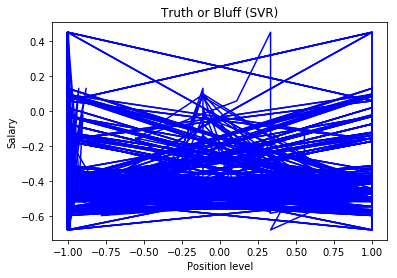

In [25]:
#plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_test, t, color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [26]:
@jit
def sv_linear_train():
    sv_reg_linear = SVR(kernel='linear', cache_size=7000)
    sv_reg_linear.fit(X_train, y_train )
    return sv_reg_linear
model_linear = sv_linear_train()

E:\Applications\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
t = model_linear.predict(X_test)
variance = metrics.explained_variance_score(y_test, t)
rms = sqrt(metrics.mean_squared_error(y_test,t))
print(rms)
print(variance)
print(reg.coef_)

0.45540784212601026
-0.012676871162880854
[[ 7.76869837e+12 -3.59863281e-01 -8.75488281e-01  1.13671875e+00
   8.02490234e-01 -2.92437742e+10 -2.92437742e+10 -2.92437742e+10
  -2.92437742e+10 -2.92437742e+10 -2.92437742e+10 -2.92437742e+10
  -2.92437742e+10 -2.92437742e+10 -2.92437742e+10 -2.92437742e+10
  -2.92437742e+10 -2.92437742e+10 -2.92437742e+10 -2.92437742e+10
   1.21685103e+11  6.97549013e+10 -1.76482899e+11 -8.71411807e+10
   1.25841476e+10  8.36416654e+10  3.02285162e+09 -1.35131353e+10
  -5.15450332e+10 -7.13337998e+09  5.06742289e+10  6.97549013e+10
   5.26498523e+11 -3.36690185e+11  3.53366723e+12  2.67047852e+12
   1.80728981e+12  9.44101103e+11  8.09123955e+10 -7.82276312e+11
  -1.64546502e+12 -2.50865373e+12 -3.37184244e+12 -8.46607474e+08
  -1.09947563e+11 -8.46607474e+08 -5.80173612e+10  1.88220440e+11
  -8.46607474e+08  9.88787208e+10 -8.46607474e+08 -8.46607474e+08
  -7.19041253e+10  8.71468852e+09 -8.46607474e+08 -8.46607474e+08
   2.52506754e+10 -5.80173612e+10 

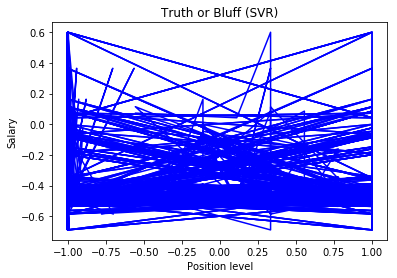

In [28]:
#plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_test, t, color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [29]:
@jit
def sv_poly_train():
    sv_reg_poly = SVR(kernel='poly', cache_size=7000)
    sv_reg_poly.fit(X_train, y_train)
    return sv_reg_poly
model_poly = sv_poly_train()

E:\Applications\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Applications\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [30]:
t = model_poly.predict(X_test)
variance = metrics.explained_variance_score(y_test, t)
rms = sqrt(metrics.mean_squared_error(y_test,t))
print(rms)
print(variance)
print(reg.coef_)

0.46659309107960095
-0.06272221270707012
[[ 7.76869837e+12 -3.59863281e-01 -8.75488281e-01  1.13671875e+00
   8.02490234e-01 -2.92437742e+10 -2.92437742e+10 -2.92437742e+10
  -2.92437742e+10 -2.92437742e+10 -2.92437742e+10 -2.92437742e+10
  -2.92437742e+10 -2.92437742e+10 -2.92437742e+10 -2.92437742e+10
  -2.92437742e+10 -2.92437742e+10 -2.92437742e+10 -2.92437742e+10
   1.21685103e+11  6.97549013e+10 -1.76482899e+11 -8.71411807e+10
   1.25841476e+10  8.36416654e+10  3.02285162e+09 -1.35131353e+10
  -5.15450332e+10 -7.13337998e+09  5.06742289e+10  6.97549013e+10
   5.26498523e+11 -3.36690185e+11  3.53366723e+12  2.67047852e+12
   1.80728981e+12  9.44101103e+11  8.09123955e+10 -7.82276312e+11
  -1.64546502e+12 -2.50865373e+12 -3.37184244e+12 -8.46607474e+08
  -1.09947563e+11 -8.46607474e+08 -5.80173612e+10  1.88220440e+11
  -8.46607474e+08  9.88787208e+10 -8.46607474e+08 -8.46607474e+08
  -7.19041253e+10  8.71468852e+09 -8.46607474e+08 -8.46607474e+08
   2.52506754e+10 -5.80173612e+10 -

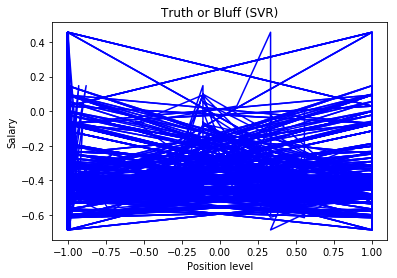

In [32]:
#plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_test, t, color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [33]:
@jit
def sv_sigmoid_train():
    sv_reg_sigmoid = SVR(kernel='sigmoid', cache_size=7000)
    sv_reg_sigmoid.fit(X_train, y_train )
    return sv_reg_sigmoid
model_sigmoid = sv_sigmoid_train()

E:\Applications\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Applications\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [34]:
t = model_sigmoid.predict(X_test)
variance = metrics.explained_variance_score(y_test,t)
rms = sqrt(metrics.mean_squared_error(y_test,t))
print(rms)
print(variance)
print(reg.coef_)

0.474627821947643
-0.09032874479016173
[[ 7.76869837e+12 -3.59863281e-01 -8.75488281e-01  1.13671875e+00
   8.02490234e-01 -2.92437742e+10 -2.92437742e+10 -2.92437742e+10
  -2.92437742e+10 -2.92437742e+10 -2.92437742e+10 -2.92437742e+10
  -2.92437742e+10 -2.92437742e+10 -2.92437742e+10 -2.92437742e+10
  -2.92437742e+10 -2.92437742e+10 -2.92437742e+10 -2.92437742e+10
   1.21685103e+11  6.97549013e+10 -1.76482899e+11 -8.71411807e+10
   1.25841476e+10  8.36416654e+10  3.02285162e+09 -1.35131353e+10
  -5.15450332e+10 -7.13337998e+09  5.06742289e+10  6.97549013e+10
   5.26498523e+11 -3.36690185e+11  3.53366723e+12  2.67047852e+12
   1.80728981e+12  9.44101103e+11  8.09123955e+10 -7.82276312e+11
  -1.64546502e+12 -2.50865373e+12 -3.37184244e+12 -8.46607474e+08
  -1.09947563e+11 -8.46607474e+08 -5.80173612e+10  1.88220440e+11
  -8.46607474e+08  9.88787208e+10 -8.46607474e+08 -8.46607474e+08
  -7.19041253e+10  8.71468852e+09 -8.46607474e+08 -8.46607474e+08
   2.52506754e+10 -5.80173612e+10 -8.

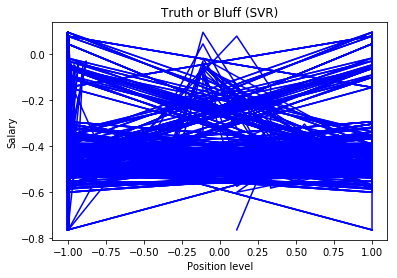

In [35]:
#plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_test, t, color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()